# Linee Segnalatrici di Probabilità Pluviometrica (LSPP)

Matteo Franzoi - Andrea Rebellato - 2019-03-27

---

In [3]:
import os
from pandas import *
import pandas as pd
from numpy import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
pd.set_option('display.max_rows', 10)
data = read_csv('massimePrecipitazioniCenta.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,15min,30min,45min,1h,3h,6h,12h,24h
anno,,,,,,,,
1934,NaN,NaN,NaN,22.6,42.0,56.6,58.8,85.0
1935,NaN,NaN,NaN,17.8,32.6,54.2,63.6,88.0
1936,NaN,NaN,NaN,15.8,28.0,41.4,72.0,85.2
1937,NaN,NaN,NaN,27.8,35.6,38.2,58.4,62.6
1938,NaN,NaN,NaN,15.0,21.4,32.0,56.0,83.0
...,...,...,...,...,...,...,...,...
2000,23.2,33.0,34.8,36.4,42.2,52.8,90.0,120.4
2003,16.2,27.0,34.8,37.4,38.8,62.8,101.0,121.6
2004,25.8,37.4,40.2,42.2,43.0,45.2,57.6,80.4


In [5]:
os.getcwd()

'D:\\git\\jupyter\\esercitazione'

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'an_scrosci',
 'best_parameters',
 'intensityCenta.ipynb',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 'abs_ls',  
 'abs_m',  
 'abs_mle',  
 '**best_parameters**',  
 'lsCenta.ipynb',  
 'lsppCenta.ipynb',  
 'massimePrecipitazioniCenta.csv',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb',  
 'pearsonCenta.ipynb']

In [7]:
best = read_pickle('best_parameters')
best

,15min,30min,45min,1h,3h,6h,12h,24h
a,11.511128,15.102191,17.286796,20.077738,30.042461,40.251064,56.917858,76.440792
b,4.257718,5.406040,5.596108,6.560461,9.253392,13.179424,21.080260,24.643281


Con un tempo di ritorno di $10$ anni ci si aspetta un quantile del valore di $0.9$, poiché
$$
\large qu = 1- \dfrac{1}{T_r}
$$

Si definisce la funzione `qtls` che calcola l'inversa della distribuzione di Gumbel in funzione al quantile scelto

In [8]:
def qtls(df, qu):
    rv = gumbel_r(loc = df[h]['a'], scale = df[h]['b'])
    return rv.ppf(qu)

---
A questo punto è bene suddividere i dati relativi agli scrosci, cioè alle precipitazioni con durata inferiore a 1 ora, dai dati delle precipitazioni.
## Scrosci
In entrambi i casi sono stati considerati 3 diversi tempi di ritorno:
* 10 anni;
* 20 anni;
* 100 anni.

Nel DataFrame **pts** sono raccolti i valori di precipitazione relativi ai vari tempi di ritorno.

In [9]:
Tr=10
q10=1-1/Tr
q20=1-1/20
q100=1-1/100

#----------------------------------------------------------
def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

#----------------------------------------------------------
pts = pd.DataFrame([[
           qtls(best["15min"],q10),
           qtls(best["30min"],q10),
           qtls(best["45min"],q10)],
          [qtls(best["15min"],q20),
           qtls(best["30min"],q20),
           qtls(best["45min"],q20)],
          [qtls(best["15min"],q100),
           qtls(best["30min"],q100),
           qtls(best["45min"],q100)]], 
              index=[10, 20, 100],columns=[15, 30, 45]).T

#----------------------------------------------------------
pts

,10,20,100
15,21.092559,24.157383,31.097268
30,27.267768,31.159187,39.970784
45,29.880094,33.908329,43.029728


### Plot
Si può procedere al plot dei valori contenuti nel DataFrame __pts__ con un _diagramma lineare_

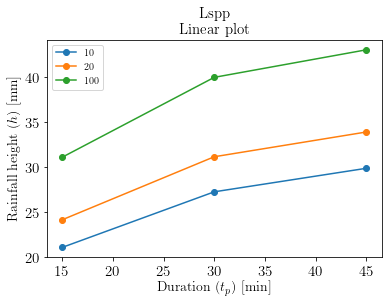

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#----------------------------------------------
ag = pts.plot(style = "o-")

#---------------label--------------------------
plt.xlabel('Duration 'r'$\left(t_p\right)$ [min]', fontsize = 14)
plt.ylabel('Rainfall height 'r'$\left(h\right)$ [mm]', fontsize = 14)
plt.title('Lspp\nLinear plot', fontsize = 15)
#plt.legend([r'$T_r = 10y$', r'$T_r = 20y$', r'$T_r = 100y$'], loc = 0,  fontsize = 12)

#----------------------------------------------
plt.show()

o in modo più significativo con un diagramma _bi-logaritmico_

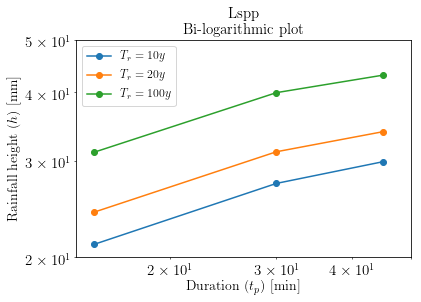

In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#------------------------------------------------------------------
ag = pts.plot(style = "o-")
ag.set_yscale('log')
ag.set_xscale('log')

#--------------------label-----------------------------------------
plt.xlabel('Duration 'r'$\left(t_p\right)$ [min]', fontsize = 14)
plt.ylabel('Rainfall height 'r'$\left(h\right)$ [mm]', fontsize = 14)
plt.title('Lspp\nBi-logarithmic plot', fontsize = 15)
plt.legend([r'$T_r = 10y$', r'$T_r = 20y$', r'$T_r = 100y$'], loc = 0,  fontsize = 12)
ag.set_xlim([14, 50])
ag.set_ylim([20, 50])

#------------------------------------------------------------------
plt.show()

### "Fitting" curve

Ricordando che l'altezza di precipitazione è legata al tempo di ritorno mediante la seguente relazione
$$
h(t_p, T_r) = a\,\left(T_r\right)\,t_p^n
$$ 

e calcolandone il logaritmo 
$$
\log h\left(t_p, T_r\right) = \log a\left(T_r\right) + n\,\log t_p
$$

Per approssimare al meglio i valori di __a__ e **n**, viene usata la funzione `np.polyfit` che applica il _metodo dei minimi quadrati_ a un polinomio.  
In particolare riceve in input le coordinate $\left(x_i, y_i\right)$ del i-esimo punto e il grado del polinomio:
$$
np.polyfit\,(x, y, deg, \dots)
$$
e ritorna i coefficienti del polinomio.

In questo caso, i valori $x_i$ si identificano con il logaritmo dell'indice del DataFrame __pts__ ($\log 15$, $\log 30$, $\log 45$), mentre $y_i$ è il logaritmo dei valori $h$ relativi al tempo di ritorno considerato.

In [12]:
in10=np.polyfit(np.log(pts[10].index),np.log(pts[10]),1)
in10[1]=np.exp(in10[1])
in10

array([0.3227668 , 8.87966537])

In [13]:
in20=np.polyfit(np.log(pts[20].index),np.log(pts[20]),1)
in20[1]=np.exp(in20[1])
in20

array([ 0.31494104, 10.39658743])

In [14]:
in100=np.polyfit(np.log(pts[100].index),np.log(pts[100]),1)
in100[1]=np.exp(in100[1])
in100

array([ 0.30278453, 13.84963118])

Si crea un DataFrame contenente i valori appena calcolati, corrispondenti ad __a__ e **n**

In [15]:
fnl=DataFrame([in10,in20,in100],index=[10,20,100],columns=["n","a"])
fnl

,n,a
10,0.322767,8.879665
20,0.314941,10.396587
100,0.302785,13.849631


In [16]:
fnl.to_pickle('an_scrosci')

In [14]:
tp=np.linspace(.7,50,100)

Viene definita la funzione
$$
h(t_p, T_r) = a\,\left(T_r\right)\,t_p^n
$$ 

come

In [15]:
def h(tp,a,n):
    return a*tp**n

da cui si calcolano i valori di $h$ per ogni tempo di ritorno

In [16]:
h10=h(tp,fnl["a"][10],fnl["n"][10])
h20=h(tp,fnl["a"][20],fnl["n"][20])
h100=h(tp,fnl["a"][100],fnl["n"][100])

che vengono inseriti nel DataFrame __inh__.

In [17]:
inh=DataFrame([h10,h20,h100],index=["Tr = 10y","Tr = 20y","Tr = 100y"],
              columns=tp).T
inh

,Tr = 10y,Tr = 20y,Tr = 100y
0.700000,7.914061,9.291928,12.431865
1.197980,9.412771,11.005196,14.628221
1.695960,10.530386,12.278439,16.251808
2.193939,11.442807,13.315468,17.569352
2.691919,12.223803,14.201525,18.691938
...,...,...,...
48.008081,30.979118,35.188900,44.721275
48.506061,31.082474,35.303450,44.861228
49.004040,31.185114,35.417197,45.000182
49.502020,31.287050,35.530156,45.138156


#### Plot

È possibile plottare il DataFrame __inh__.

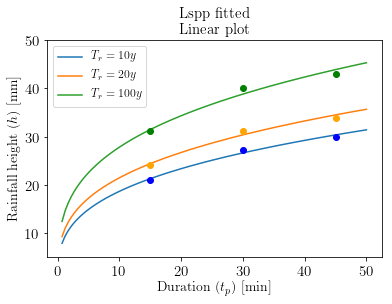

In [18]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#----------------------------------------------------------------------
ag = inh.plot()

#-----------------------------------------------------------------
ag = plt.plot(pts[10],"o",color="blue")
ag = plt.plot(pts[20],"o",color="orange")
ag = plt.plot(pts[100],"o",color="green")

#----------------------------------------------------------------
plt.ylim([5, 50])

#----------------------label-------------------------------------------
plt.xlabel('Duration ' r'$\left(t_p\right)$ [min]', fontsize = 14)
plt.ylabel('Rainfall height 'r'$\left(h\right)$ [mm]', fontsize = 14)
plt.title('Lspp fitted\nLinear plot', fontsize = 15)
plt.legend([r'$T_r = 10y$', r'$T_r = 20y$', r'$T_r = 100y$'], loc = 0,  fontsize = 12)

#----------------------------------------------------------------------
plt.show()

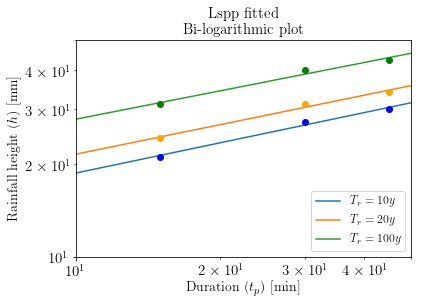

In [19]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#-----------------------------------------------------------------
ag = inh.plot()

#-----------------------------------------------------------------
ag.set_xscale('log')
ag.set_yscale('log')
plt.xlim([10, 50])
plt.ylim([10, 50])

#-----------------------------------------------------------------
ag = plt.plot(pts[10],"o",color="blue")
ag = plt.plot(pts[20],"o",color="orange")
ag = plt.plot(pts[100],"o",color="green")

#--------------------label-----------------------------------------
plt.xlabel('Duration ' r'$\left(t_p\right)$ [min]', fontsize = 14)
plt.ylabel('Rainfall height 'r'$\left(h\right)$ [mm]', fontsize = 14)
plt.title('Lspp fitted\nBi-logarithmic plot', fontsize = 15)
plt.legend([r'$T_r = 10y$', r'$T_r = 20y$', r'$T_r = 100y$'], loc = 4,  fontsize = 12)

#------------------------------------------------------------------
plt.show()

---

## Precipitazioni

Il medesimo procedimento viene eseguito per le precipitazioni di 1h, 3h, 6h, 12h e 24h.

In [20]:
Tr=10
q10=1-1/Tr
q20=1-1/20
q100=1-1/100

def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

pts=DataFrame([[
           qtls(best["1h"],q10),
           qtls(best["3h"],q10),
           qtls(best["6h"],q10),
           qtls(best["12h"],q10),
           qtls(best["24h"],q10)],
          [qtls(best["1h"],q20),
           qtls(best["3h"],q20),
           qtls(best["6h"],q20),
           qtls(best["12h"],q20),
           qtls(best["24h"],q20)],
          [qtls(best["1h"],q100),
           qtls(best["3h"],q100),
           qtls(best["6h"],q100),
           qtls(best["12h"],q100),
           qtls(best["24h"],q100)]], 
              index=[10, 20, 100],columns=[1, 3, 6, 12, 24]).T
pts

,10,20,100
1,34.841184,39.563586,50.256835
3,50.865991,57.526841,72.609443
6,69.909609,79.396527,100.878382
12,104.356186,119.530345,153.890198
24,131.897226,149.636147,189.803561


### Plot

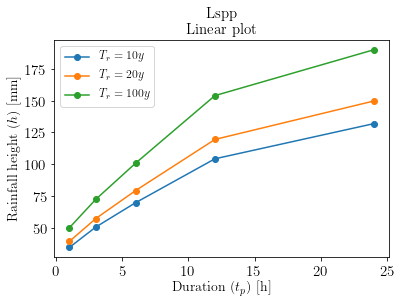

In [21]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#----------------------------------------------
ag = pts.plot(style = "o-")

#---------------label--------------------------
plt.xlabel('Duration 'r'$\left(t_p\right)$ [h]', fontsize = 14)
plt.ylabel('Rainfall height 'r'$\left(h\right)$ [mm]', fontsize = 14)
plt.title('Lspp\nLinear plot', fontsize = 15)
plt.legend([r'$T_r = 10y$', r'$T_r = 20y$', r'$T_r = 100y$'], loc = 0,  fontsize = 12)

#----------------------------------------------
plt.show()

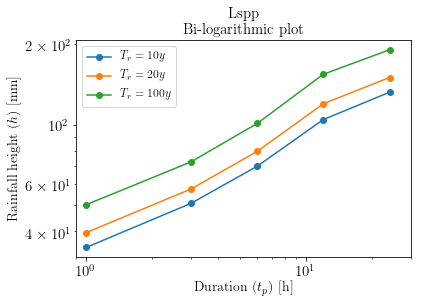

In [22]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#------------------------------------------------------------------
ag = pts.plot(style = "o-")
ag.set_yscale('log')
ag.set_xscale('log')

#--------------------label-----------------------------------------
plt.xlabel('Duration 'r'$\left(t_p\right)$ [h]', fontsize = 14)
plt.ylabel('Rainfall height 'r'$\left(h\right)$ [mm]', fontsize = 14)
plt.title('Lspp\nBi-logarithmic plot', fontsize = 15)
plt.legend([r'$T_r = 10y$', r'$T_r = 20y$', r'$T_r = 100y$'], loc = 0,  fontsize = 12)
plt.xlim([0.9, 30])


#------------------------------------------------------------------
plt.show()

### "Fitting" curve

$$h(t_p, T_r) = a\,\left(T_r\right)\,t_p^n$$  
$$ \log h\left(t_p, T_r\right) = \log a\left(T_r\right) + n\,\log t_p$$

In [23]:
in10=np.polyfit(np.log(pts[10].index),np.log(pts[10]),1)
in10[1]=np.exp(in10[1])
in10

array([ 0.43358752, 33.43765041])

In [24]:
in20=np.polyfit(np.log(pts[20].index),np.log(pts[20]),1)
in20[1]=np.exp(in20[1])
in20

array([ 0.43487985, 37.914897  ])

In [25]:
in100=np.polyfit(np.log(pts[100].index),np.log(pts[100]),1)
in100[1]=np.exp(in100[1])
in100

array([ 0.43689245, 48.05278   ])

In [26]:
fnl=DataFrame([in10,in20,in100],index=[10,20,100],columns=["n","a"])
fnl

,n,a
10,0.433588,33.437650
20,0.434880,37.914897
100,0.436892,48.052780


In [27]:
tp = np.linspace(.7, 30, 100)

In [28]:
def h(tp, a, n):
    return a*tp**n

In [29]:
h10 = h(tp, fnl['a'][10], fnl['n'][10])
h20 = h(tp, fnl['a'][20], fnl['n'][20])
h100 = h(tp, fnl['a'][100], fnl['n'][100])

In [30]:
inh = pd.DataFrame([
    h10,
    h20,
    h100
], index=["Tr = 10","Tr = 20","Tr = 100"], columns=tp).T
inh

,Tr = 10,Tr = 20,Tr = 100
0.700000,28.646541,32.467297,41.119045
0.995960,33.379005,37.848201,47.967859
1.291919,37.365088,42.382239,53.742319
1.587879,40.860874,46.359773,58.810395
1.883838,44.003908,49.936813,63.369898
...,...,...,...
28.816162,143.587212,163.522015,208.651984
29.112121,144.224786,164.250274,209.585544
29.408081,144.858699,164.974362,210.513775
29.704040,145.489009,165.694344,211.436760


#### Plot

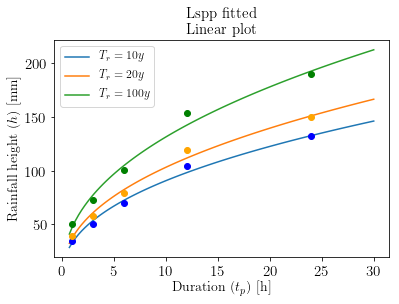

In [31]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#----------------------------------------------------------------------
ag = inh.plot()

#-----------------------------------------------------------------
ag = plt.plot(pts[10],"o",color="blue")
ag = plt.plot(pts[20],"o",color="orange")
ag = plt.plot(pts[100],"o",color="green")

#----------------------------------------------------------------

#----------------------label-------------------------------------------
plt.xlabel('Duration 'r'$\left(t_p\right)$ [h]', fontsize = 14)
plt.ylabel('Rainfall height 'r'$\left(h\right)$ [mm]', fontsize = 14)
plt.title('Lspp fitted\nLinear plot', fontsize = 15)
plt.legend([r'$T_r = 10y$', r'$T_r = 20y$', r'$T_r = 100y$'], loc = 0,  fontsize = 12)

#----------------------------------------------------------------------
plt.show()

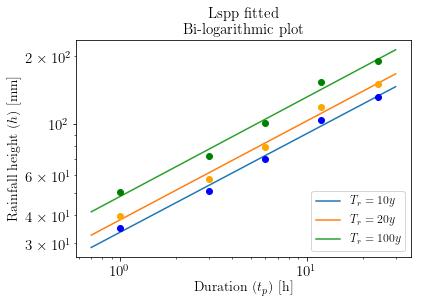

In [33]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#-----------------------------------------------------------------
ag = inh.plot()

#-----------------------------------------------------------------
ag.set_xscale('log')
ag.set_yscale('log')

#-----------------------------------------------------------------
ag = plt.plot(pts[10],"o",color="blue")
ag = plt.plot(pts[20],"o",color="orange")
ag = plt.plot(pts[100],"o",color="green")

#--------------------label-----------------------------------------
plt.xlabel('Duration 'r'$\left(t_p\right)$ [h]', fontsize = 14)
plt.ylabel('Rainfall height 'r'$\left(h\right)$ [mm]', fontsize = 14)
plt.title('Lspp fitted\nBi-logarithmic plot', fontsize = 15)
plt.legend([r'$T_r = 10y$', r'$T_r = 20y$', r'$T_r = 100y$'], loc = 4, fontsize = 12)

#------------------------------------------------------------------
plt.show()